In [294]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Loading Data

In [296]:
df = pd.read_excel('/content/drive/MyDrive/Data_assignment_ECO612.xlsx', sheet_name=["Monthly_data", "Quarterly_data"])
Q_df = df["Quarterly_data"]
M_df = df["Monthly_data"]
M_df.head()

,Start,1999-08-15 00:00:00,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,End,2024-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Frequency,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name,IN CPI: RURAL AND URBAN - GENERAL INDEX NADJ,IN REPO RATE (EP) NADJ,IN TREASURY BOND YIELD: 10 YEAR NADJ,IN MONEY SUPPLY: M2 (EP) CURN,IN INDUSTRIAL PRODN. (EXCLUDING CONSTRUCTION &...,IN INDIA RUPEE - REAL EFFECTIVE EXCHANGE RATE ...,IN INDIAN RUPEES PER US DOLLAR (RBI) NADJ,IN MONEY SUPPLY: M1 (EP) CURN,IN MONEY SUPPLY: M4 (EP) CURN,...,IN FOREIGN INVESTMENT INFLOWS: DIRECT INVESTME...,IN INDUSTRIAL PRODUCTION - CONSUMER NON DURABL...,"IN INDUSTRIAL PRODN-MOTOR VEHICLES, TRAILERS &...",IN CPI: RURAL - CLOTHING AND FOOTWEAR NADJ,IN CPI: RURAL - CONSUMER FOOD PRICE INDEX NADJ,IN CPI: RURAL AND URBAN - CLOTHING NADJ,IN CPI: RURAL AND URBAN - CONSUMER FOOD PRICE ...,IN CPI: RURAL AND URBAN - FOOD AND BEVERAGES NADJ,IN CPI: URBAN - FOOTWEAR NADJ,FOREIGN EXCHANGE RESERVES - ECONOMIC SERIES
3,Code,INCONPRCF,INPRATE.,INGBOND.,INM2....A,INIPTOT.H,INXTW..RF,INXRUSD.,INM1....A,INM4....A,...,INFIIDINA,INIPNDURH,INIPMVTNH,INCPRCLFF,INCPRCFPF,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES
4,1999-08-15 00:00:00,NaN,NaN,11.64,3130.74,NaN,NaN,43.46,3078.54,10582.72,...,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
df_sentiment = pd.read_csv("/content/drive/MyDrive/sentiment_scores.csv")
df_sentiment_finbert123 = pd.read_csv("/content/drive/MyDrive/sentiment_scores_finbert_123.csv")
df_sentiment_finbert = pd.read_csv("/content/drive/MyDrive/sentiment_scores_finbert.csv")
df_pui = pd.read_excel("/content/drive/MyDrive/India_Policy_Uncertainty_Data.xlsx")
df_sentiment.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_sentiment_finbert123.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_sentiment_finbert123.rename(columns={'Average_Sentiment': 'fin123'}, inplace=True)
df_sentiment_finbert.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_sentiment_finbert.rename(columns={'Average_Sentiment': 'fin'}, inplace=True)
df_sentiment['Date'] = df_sentiment['Date'].str.replace('processed_', '').str.replace('.txt', '').str.replace('_', ' ')
df_sentiment

,Date,Sentiment_Cat,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Uncertainity
0,Q4 2014,1,0.380000,0.620000,0.540000
1,Q1 2015,1,0.214286,0.542857,0.600000
2,Q4 2015,1,0.278571,0.500000,0.607143
3,Q1 2016,1,0.171429,0.571429,0.514286
4,Q4 2016,1,0.188889,0.500000,0.388889
5,Q1 2017,1,0.160000,0.660000,0.580000
6,Q4 2017,1,0.209091,0.536364,0.472727
7,Q1 2018,1,0.133333,0.525000,0.483333
8,Q4 2018,2,0.200000,0.591667,0.383333
9,Q1 2019,1,0.186154,0.584615,0.415385


In [298]:
df_pui

,Year,Month,India News-Based Policy Uncertainty Index
0,2003,1.0,49.281837
1,2003,2.0,69.260142
2,2003,3.0,113.419067
3,2003,4.0,80.293443
4,2003,5.0,62.984579
...,...,...,...
255,2024,4.0,137.175109
256,2024,5.0,83.037556
257,2024,6.0,141.560188
258,2024,7.0,180.885927


#Quarterly Data Cleaning

In [302]:
#Removing First 3 rows
Q_df = Q_df.iloc[3: , :]
Q_df.head()

,Start,Q3 1999,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131
3,Code,INCONPRCF,INGDP...C,INGDP...A,INPRATE.,INGBOND.,INEXNGS.C,INCNPER.C,INCNPER.A,INGFCF..C,...,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES,INGDPAGRC,INGDPCONC,INGDPELEC,INGDPFINC,INGDPMANC
4,Q3 1999,NaN,NaN,NaN,NaN,11.58,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Q4 1999,NaN,NaN,NaN,NaN,11.25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Q1 2000,NaN,NaN,NaN,NaN,10.87,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Q2 2000,NaN,NaN,NaN,NaN,11.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
Q_df = Q_df.rename(columns=Q_df.iloc[0]).loc[1:]
Q_df.head()

,Code,INCONPRCF,INGDP...C,INGDP...A,INPRATE.,INGBOND.,INEXNGS.C,INCNPER.C,INCNPER.A,INGFCF..C,...,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES,INGDPAGRC,INGDPCONC,INGDPELEC,INGDPFINC,INGDPMANC
3,Code,INCONPRCF,INGDP...C,INGDP...A,INPRATE.,INGBOND.,INEXNGS.C,INCNPER.C,INCNPER.A,INGFCF..C,...,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES,INGDPAGRC,INGDPCONC,INGDPELEC,INGDPFINC,INGDPMANC
4,Q3 1999,NaN,NaN,NaN,NaN,11.58,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Q4 1999,NaN,NaN,NaN,NaN,11.25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Q1 2000,NaN,NaN,NaN,NaN,10.87,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Q2 2000,NaN,NaN,NaN,NaN,11.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
Q_df = Q_df.rename(columns=Q_df.iloc[0]).loc[1:]
Q_df = Q_df.iloc[1 :, :]
Q_df.tail()

,Code,INCONPRCF,INGDP...C,INGDP...A,INPRATE.,INGBOND.,INEXNGS.C,INCNPER.C,INCNPER.A,INGFCF..C,...,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES,INGDPAGRC,INGDPCONC,INGDPELEC,INGDPFINC,INGDPMANC
100,Q3 2023,185.533,41857.79,70902.21,6.5,7.24,9960.98,23426.1,43304.27,14350.79,...,188.867,191.567,191.667,169.633,49437.46,4409.89,3200.67,976.86,10118.47,6871.83
101,Q4 2023,185.767,43806.75,75677.05,6.5,7.2,9718.73,25729.57,48045.47,14066.89,...,190.467,191.167,191.567,170.933,49581.61,7114.58,3611.7,896.7,8204.26,6538.86
102,Q1 2024,185.7,47237.84,78281.48,6.5,7.07,11071.01,24971.79,45325.81,15701.94,...,191.567,189.533,190.367,172.033,51147.32,6308.86,4200.9,927.85,8422.56,7709.03
103,Q2 2024,188.2,NaN,NaN,6.5,NaN,NaN,NaN,NaN,NaN,...,192.7,194.167,194.5,173.033,54064.44,NaN,NaN,NaN,NaN,NaN
104,Q3 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
Q_df.rename(columns={'Code': 'Date'}, inplace=True)
Q_df.head()

,Date,INCONPRCF,INGDP...C,INGDP...A,INPRATE.,INGBOND.,INEXNGS.C,INCNPER.C,INCNPER.A,INGFCF..C,...,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES,INGDPAGRC,INGDPCONC,INGDPELEC,INGDPFINC,INGDPMANC
4,Q3 1999,NaN,NaN,NaN,NaN,11.58,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Q4 1999,NaN,NaN,NaN,NaN,11.25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Q1 2000,NaN,NaN,NaN,NaN,10.87,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Q2 2000,NaN,NaN,NaN,NaN,11.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Q3 2000,NaN,NaN,NaN,13.5,11.81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
def filter_data(df):
    # Ensure the 'Date' column is in string format and properly formatted
    df['Date'] = df['Date'].astype(str).str.strip()

    # Define the cut-off date
    cut_off_date = 'Q4 2014'

    # Create a filter to keep rows where the 'Date' is on or after the cut-off date
    # Convert to a Pandas datetime object for easier comparison
    def date_comparator(date_str):
        # Convert the quarter and year to a comparable format
        quarter, year = date_str.split()
        return f"{year}-{quarter[1]}"

    # Apply the filter to Q_df
    df_filtered = df[df['Date'].apply(lambda x: date_comparator(x) >= date_comparator(cut_off_date))]
    return df_filtered

In [307]:
# Merge the three DataFrames
merged_df = pd.merge(df_sentiment, df_sentiment_finbert123, on='Date')
merged_df = pd.merge(merged_df, df_sentiment_finbert, on='Date')

# Display the merged DataFrame
merged_df.head()
merged_df_senti = merged_df

In [308]:
Q_copy = Q_df.copy()

In [309]:
merged_df[merged_df['Date'] == 'Q4 2014'].empty

False

In [310]:
def map_sentiment_to_quarter(merged_df, Q_copy):
  Q_copy = filter_data(Q_copy)
  # Ensure the 'Date' column is in string format and properly formatted
  Q_copy['Date'] = Q_copy['Date'].astype(str).str.strip()
  for index, row in Q_copy.iterrows():
    quarter, year = row['Date'].split()
    year = int(year)
    if quarter in ['Q2', 'Q3']:
      # Map Q1 sentiment for Q2 and Q3
      matching_date = "Q1" + " " + str(year)
    elif quarter == "Q4":
      # Map Q4 sentiment for Q1 and Q4
      matching_date = "Q4" + " " + str(year)
    elif quarter == 'Q1' :
      matching_date = "Q4" + " " + str(year - 1)
      print(matching_date)
    # Find the corresponding sentiment scores in merged_df

    matching_row = merged_df[merged_df['Date'] == matching_date]
    if not matching_row.empty:
      Q_copy.loc[index, 'SP'] = matching_row['Sentiment_Polarity'].values[0]
      Q_copy.loc[index, 'SS'] = matching_row['Sentiment_Subjectivity'].values[0]
      Q_copy.loc[index, 'SU'] = matching_row['Sentiment_Uncertainity'].values[0]
      Q_copy.loc[index, 'fin123'] = matching_row['fin123'].values[0]
      Q_copy.loc[index, 'fin'] = matching_row['fin'].values[0]

  return Q_copy

# Map sentiment scores to Q_copy
Q_copy_mapped = map_sentiment_to_quarter(merged_df, Q_copy)

# Display the updated Q_copy


Q_copy_mapped = filter_data(Q_copy_mapped)

Q4 2014
Q4 2015
Q4 2016
Q4 2017
Q4 2018
Q4 2019
Q4 2020
Q4 2021
Q4 2022
Q4 2023


<ipython-input-310-c1b7541050cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q_copy['Date'] = Q_copy['Date'].astype(str).str.strip()
<ipython-input-310-c1b7541050cd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q_copy.loc[index, 'SP'] = matching_row['Sentiment_Polarity'].values[0]
<ipython-input-310-c1b7541050cd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [311]:
# Calculate the correlation
correlation0 = Q_copy_mapped['INXRUSD.'].corr(Q_copy_mapped['fin123'].shift(-4))
correlation1 = Q_copy_mapped['INXRUSD.'].corr(Q_copy_mapped['fin123'].shift(-3))
correlation2 = Q_copy_mapped['INXRUSD.'].corr(Q_copy_mapped['fin123'].shift(-2))
correlation3 = Q_copy_mapped['INXRUSD.'].corr(Q_copy_mapped['fin123'].shift(-1))
correlation4 = Q_copy_mapped['INXRUSD.'].corr(Q_copy_mapped['fin123'].shift(0))
# Print the correlation
print("Correlation between Inflation and -2 lag of SU_MiMx:", correlation0)
print("Correlation between Inflation and -2 lag of SU_MiMx:", correlation1)
print("Correlation between Inflation and -2 lag of SU_MiMx:", correlation2)
print("Correlation between Inflation and -2 lag of SU_MiMx:", correlation3)
print("Correlation between Inflation and -2 lag of SU_MiMx:", correlation4)


Correlation between Inflation and -2 lag of SU_MiMx: -0.3537981686802548
Correlation between Inflation and -2 lag of SU_MiMx: -0.3821144173354122
Correlation between Inflation and -2 lag of SU_MiMx: -0.4511726850649506
Correlation between Inflation and -2 lag of SU_MiMx: -0.4974351944969323
Correlation between Inflation and -2 lag of SU_MiMx: -0.4775287454298485


In [312]:
for column in Q_copy_mapped.columns:
  if column != 'Date':
    Q_copy_mapped[column] = Q_copy_mapped[column].astype(float)

In [313]:
data = Q_copy_mapped
df = pd.DataFrame(data)

# Select only numeric columns for regression
numeric_columns = df.select_dtypes(include=['number']).columns

# Define independent variables (with constant) and dependent variable
X = df[numeric_columns][['fin123']] # Assuming 'INGDP...A' is your dependent variable
X = sm.add_constant(X)  # Adding a constant term for the intercept
Y = df['INXRUSD.']
X.fillna(X.mean(), inplace=True)
Y.fillna(Y.mean(), inplace=True)
# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               INXRUSD.   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     10.69
Date:                Sat, 31 Aug 2024   Prob (F-statistic):            0.00229
Time:                        10:42:47   Log-Likelihood:                -124.96
No. Observations:                  40   AIC:                             253.9
Df Residuals:                      38   BIC:                             257.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.4474      1.983     39.060      0.0

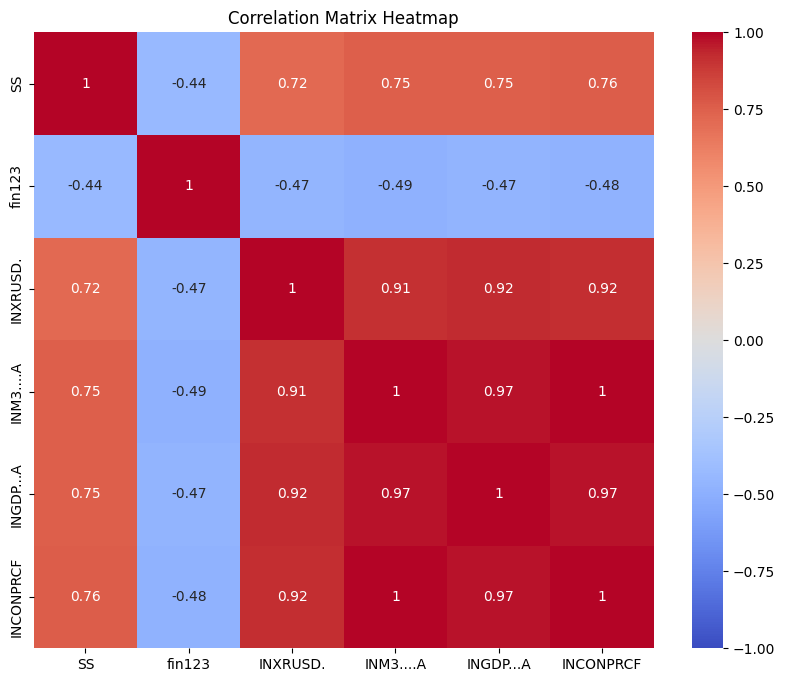

In [314]:
subset_df = Q_copy_mapped[['SS', 'fin123','INXRUSD.','INM3....A','INGDP...A','INCONPRCF']]
# Calculate the correlation matrix
correlation_matrix = subset_df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [315]:
X = df[['fin123','SP','SS','SU']]
# Create lagged variables
X['fin123_lag1'] = X['fin123'].shift(-2)
# ... add more lags as needed
X = sm.add_constant(X)  # Adding a constant term for the intercept
Y = df['INXRUSD.']
# Handle missing values (replace with mean for simplicity)
X.fillna(X.mean(), inplace=True)
Y.fillna(Y.mean(), inplace=True)
# Fit the regression model
model = sm.OLS(Y.iloc[2:], X.iloc[2:]).fit()  # Start from index 2 to account for lags
# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               INXRUSD.   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     16.93
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           3.54e-08
Time:                        10:42:47   Log-Likelihood:                -97.296
No. Observations:                  38   AIC:                             206.6
Df Residuals:                      32   BIC:                             216.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          69.6177     12.185      5.714      

<ipython-input-315-362a4b6591a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fin123_lag1'] = X['fin123'].shift(-2)


The above result shows high autocorrelation. We move further from here to explore more Options to make our sentiments work

In [316]:
data = Q_copy_mapped
df = pd.DataFrame(data)

# Select only numeric columns for regression
numeric_columns = df.select_dtypes(include=['number']).columns

# Define independent variables (excluding the constant) and dependent variable
X = df[numeric_columns][['SS', 'SU', 'SP', 'fin123']]  # Adjust this list based on your actual independent variables
X = sm.add_constant(X)  # Adding a constant term for the intercept

# Fill missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Compute and print the VIF values
vif_df = calculate_vif(X)
print(vif_df)


  Variable         VIF
0    const  216.440667
1       SS    1.436029
2       SU    1.247005
3       SP    1.489273
4   fin123    1.255885


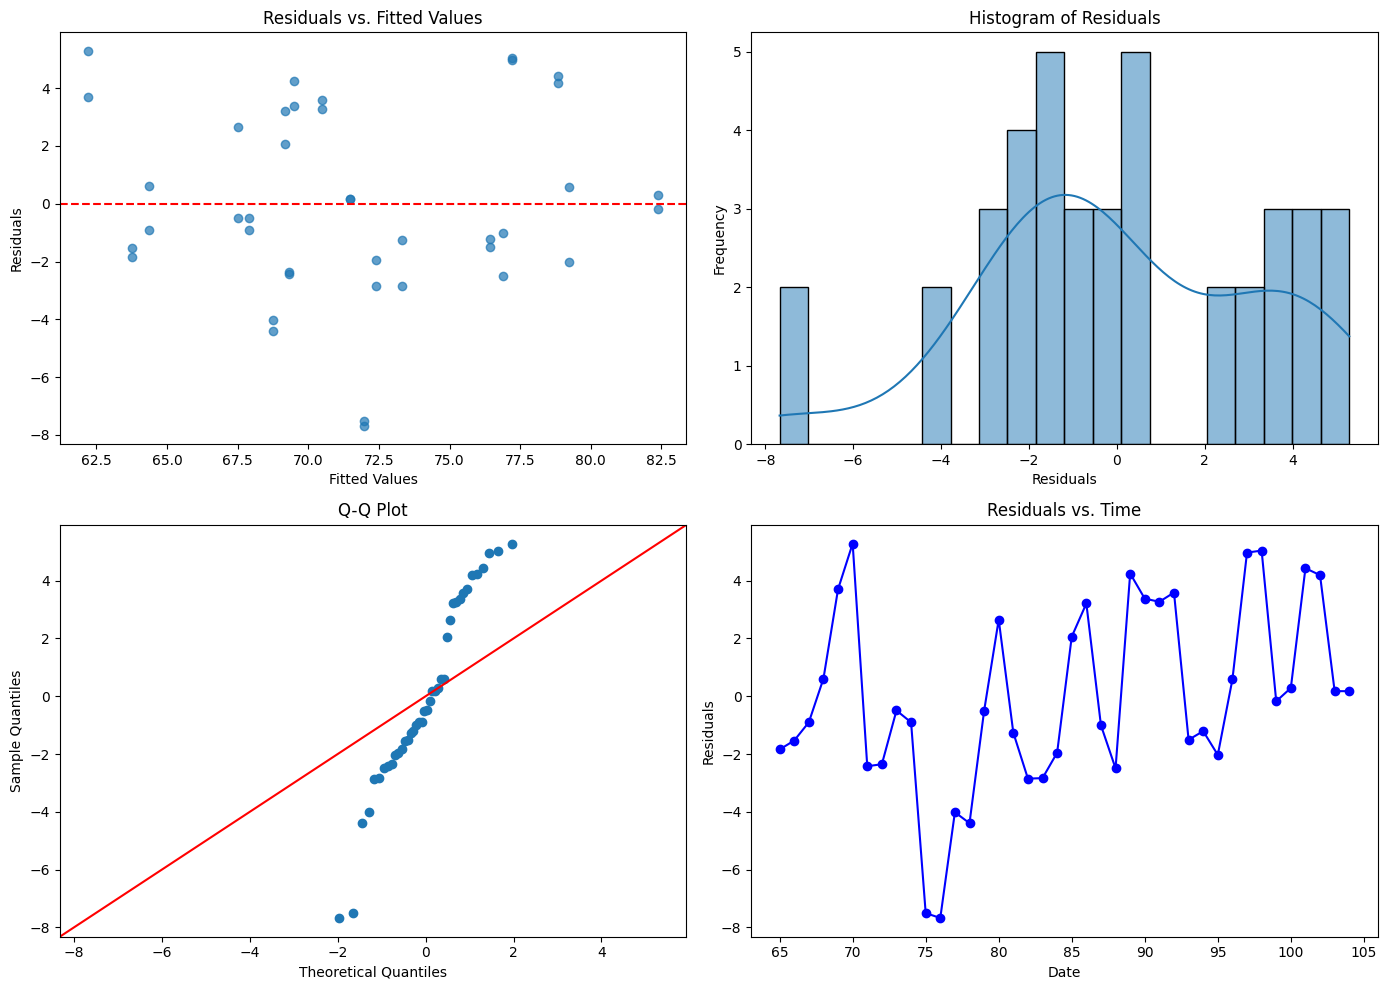

In [317]:
data = Q_copy_mapped
df = pd.DataFrame(data)
# Define independent variables (excluding the constant) and dependent variable
X = df[['SP','SU','SS','fin123']]
X = sm.add_constant(X)  # Adding a constant term for the intercept
Y = df['INXRUSD.']

# Fill missing values with the mean of each column
X.fillna(X.mean(), inplace=True)
Y.fillna(Y.mean(), inplace=True)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Plotting residuals vs. fitted values
plt.figure(figsize=(14, 10))

# Residuals vs. Fitted Values Plot
plt.subplot(2, 2, 1)
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Histogram of Residuals
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Q-Q Plot
plt.subplot(2, 2, 3)
sm.qqplot(residuals, line='45', ax=plt.gca())
plt.title('Q-Q Plot')

# Residuals vs. Time (if time series data is available)
plt.subplot(2, 2, 4)
plt.plot(df.index, residuals, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals vs. Time')

plt.tight_layout()
plt.show()

In [323]:
df = Q_copy_mapped.copy()

# Select the significant variables identified by Ridge regression
significant_features = ['INBIROEDA', 'INWPCOR%F', 'SP']

# Define the independent variables (X) and the target variable (y)
X = df[significant_features].copy()
y = df['INXRUSD.'].copy()

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               INXRUSD.   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     40.95
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.08e-11
Time:                        10:42:50   Log-Likelihood:                -100.23
No. Observations:                  40   AIC:                             208.5
Df Residuals:                      36   BIC:                             215.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.7600      2.886     20.013      0.0

In [324]:
df = Q_copy_mapped.copy()
from statsmodels.tools.tools import add_constant
# Select the significant variables identified
significant_features = ['INBIROEDA', 'INWPCOR%F', 'SP']

# Define the independent variables (X)
X = df[significant_features].copy()
X.fillna(X.mean(), inplace=True)
# Add a constant to the model (intercept)
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif_data)

     Feature        VIF
0      const  34.115554
1  INBIROEDA   1.601067
2  INWPCOR%F   1.019178
3         SP   1.618932


#Monthly Data


In [326]:
M_dfr = M_df.iloc[3: , :]
M_dfr = M_dfr.rename(columns=M_dfr.iloc[0]).loc[1:]
M_dfr = M_dfr.iloc[1: , :]
M_dfr.rename(columns={'Code': 'Date'}, inplace=True)
M_dfr.iloc[:-1]
M_dfr

,Date,INCONPRCF,INPRATE.,INGBOND.,INM2....A,INIPTOT.H,INXTW..RF,INXRUSD.,INM1....A,INM4....A,...,INFIIDINA,INIPNDURH,INIPMVTNH,INCPRCLFF,INCPRCFPF,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES
4,1999-08-15 00:00:00,NaN,NaN,11.64,3130.74,NaN,NaN,43.46,3078.54,10582.72,...,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1999-09-15 00:00:00,NaN,NaN,11.58,3172.88,NaN,NaN,43.53,3122.85,10741.42,...,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1999-10-15 00:00:00,NaN,NaN,11.59,3225,NaN,NaN,43.45,3175.27,10860.56,...,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1999-11-15 00:00:00,NaN,NaN,11.43,3260.99,NaN,NaN,43.4,3225.21,10939.61,...,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1999-12-15 00:00:00,NaN,NaN,11.25,3367.92,NaN,NaN,43.49,3315.73,11178.89,...,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2024-04-15 00:00:00,186.7,6.5,7.18,63461.24,147.7,103.47,83.41,61458.67,262656.36,...,3891,150.9,125.8,195.5,188.9,192.3,191.2,191.9,172.8,53449.21
301,2024-05-15 00:00:00,187.7,6.5,NaN,64370.4,154.6,104.68,NaN,62111.13,268132.14,...,3250,153.6,133.9,195.7,190.2,192.6,192.6,193.2,173,54064.44
302,2024-06-15 00:00:00,190.2,6.5,NaN,65137.91,150,106.36,NaN,62878.64,270004.62,...,-212,144.6,128.7,196.3,195.6,193.2,198.7,198.4,173.3,54559.21
303,2024-07-15 00:00:00,192.9,6.5,NaN,63041.14,NaN,107.33,NaN,NaN,NaN,...,NaN,NaN,NaN,196.7,201.3,193.6,204.3,203.3,173.8,56125.21


In [327]:
import pandas as pd

def transform_date(date_str):
  date_obj = pd.to_datetime(date_str)
  month_num = date_obj.strftime('%m')
  year = date_obj.strftime('%Y')
  return f"{month_num} {year}"

M_dfr['Date'] = M_dfr['Date'].apply(transform_date)
print(M_dfr.head())

      Date INCONPRCF INPRATE. INGBOND. INM2....A INIPTOT.H INXTW..RF INXRUSD.  \
4  08 1999       NaN      NaN    11.64   3130.74       NaN       NaN    43.46   
5  09 1999       NaN      NaN    11.58   3172.88       NaN       NaN    43.53   
6  10 1999       NaN      NaN    11.59      3225       NaN       NaN    43.45   
7  11 1999       NaN      NaN    11.43   3260.99       NaN       NaN     43.4   
8  12 1999       NaN      NaN    11.25   3367.92       NaN       NaN    43.49   

  INM1....A INM4....A  ... INFIIDINA INIPNDURH INIPMVTNH INCPRCLFF INCPRCFPF  \
4   3078.54  10582.72  ...       345       NaN       NaN       NaN       NaN   
5   3122.85  10741.42  ...        96       NaN       NaN       NaN       NaN   
6   3175.27  10860.56  ...       128       NaN       NaN       NaN       NaN   
7   3225.21  10939.61  ...       113       NaN       NaN       NaN       NaN   
8   3315.73  11178.89  ...       159       NaN       NaN       NaN       NaN   

  INCPCCLOF INCPCCFPF INCPCFABF 

In [328]:
def filter_data(df):
    df['Date'] = df['Date'].astype(str).str.strip()
    # Define the cut-off date
    cut_off_year = 2003
    # Create a filter to keep rows where the year is on or after the cut-off year
    df_filtered = df[df['Date'].str.split().str[1].astype(int) >= cut_off_year]
    return df_filtered

M_dfr = filter_data(M_dfr)
M_dfr

,Date,INCONPRCF,INPRATE.,INGBOND.,INM2....A,INIPTOT.H,INXTW..RF,INXRUSD.,INM1....A,INM4....A,...,INFIIDINA,INIPNDURH,INIPMVTNH,INCPRCLFF,INCPRCFPF,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES
45,01 2003,NaN,7.5,6.34,4640.41,NaN,NaN,47.93,4530.13,17166.29,...,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,02 2003,NaN,7.5,6.23,4758.23,NaN,NaN,47.73,4625.27,17324.18,...,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,03 2003,NaN,7,6.19,4873.8,NaN,NaN,47.64,4676.15,17424.95,...,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,04 2003,NaN,7,5.91,5047.08,NaN,NaN,47.38,4938.75,17903.95,...,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,05 2003,NaN,7,5.85,5069.38,NaN,NaN,47.08,4906.38,17999.16,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,04 2024,186.7,6.5,7.18,63461.24,147.7,103.47,83.41,61458.67,262656.36,...,3891,150.9,125.8,195.5,188.9,192.3,191.2,191.9,172.8,53449.21
301,05 2024,187.7,6.5,NaN,64370.4,154.6,104.68,NaN,62111.13,268132.14,...,3250,153.6,133.9,195.7,190.2,192.6,192.6,193.2,173,54064.44
302,06 2024,190.2,6.5,NaN,65137.91,150,106.36,NaN,62878.64,270004.62,...,-212,144.6,128.7,196.3,195.6,193.2,198.7,198.4,173.3,54559.21
303,07 2024,192.9,6.5,NaN,63041.14,NaN,107.33,NaN,NaN,NaN,...,NaN,NaN,NaN,196.7,201.3,193.6,204.3,203.3,173.8,56125.21


In [329]:
df_pui=df_pui.iloc[:-1]
df_pui.tail()

,Year,Month,India News-Based Policy Uncertainty Index
254,2024,3.0,91.722264
255,2024,4.0,137.175109
256,2024,5.0,83.037556
257,2024,6.0,141.560188
258,2024,7.0,180.885927


In [330]:
df_pui['Date'] = pd.to_datetime(df_pui['Month'].astype(int).astype(str) + ' ' + df_pui['Year'].astype(str), format='%m %Y').dt.to_period('M')

<ipython-input-330-44fe7db6f71c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pui['Date'] = pd.to_datetime(df_pui['Month'].astype(int).astype(str) + ' ' + df_pui['Year'].astype(str), format='%m %Y').dt.to_period('M')


In [331]:
df_pui.drop(['Month', 'Year'], axis=1, inplace=True)

<ipython-input-331-9cbeaa570615>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pui.drop(['Month', 'Year'], axis=1, inplace=True)


In [332]:
df_pui.rename(columns={'India News-Based Policy Uncertainty Index': 'UI'}, inplace=True)

<ipython-input-332-0358ba206f69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pui.rename(columns={'India News-Based Policy Uncertainty Index': 'UI'}, inplace=True)


In [333]:
df_pui

,UI,Date
0,49.281837,2003-01
1,69.260142,2003-02
2,113.419067,2003-03
3,80.293443,2003-04
4,62.984579,2003-05
...,...,...
254,91.722264,2024-03
255,137.175109,2024-04
256,83.037556,2024-05
257,141.560188,2024-06


In [334]:
def convert_date(date_str):
    day, year = date_str.split(' ')
    month = int(day)
    return pd.to_datetime(f"{year}-{month:02d}", format="%Y-%m")

M_dfr['Date'] = M_dfr['Date'].apply(convert_date).dt.to_period('M')

<ipython-input-334-f69c10148120>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_dfr['Date'] = M_dfr['Date'].apply(convert_date).dt.to_period('M')


In [335]:
M_dfr = M_dfr.iloc[:-1]

In [336]:
merged_df = pd.merge(M_dfr, df_pui, on='Date', how='inner')

In [337]:
merged_df

,Date,INCONPRCF,INPRATE.,INGBOND.,INM2....A,INIPTOT.H,INXTW..RF,INXRUSD.,INM1....A,INM4....A,...,INIPNDURH,INIPMVTNH,INCPRCLFF,INCPRCFPF,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES,UI
0,2003-01,NaN,7.5,6.34,4640.41,NaN,NaN,47.93,4530.13,17166.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.281837
1,2003-02,NaN,7.5,6.23,4758.23,NaN,NaN,47.73,4625.27,17324.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.260142
2,2003-03,NaN,7,6.19,4873.8,NaN,NaN,47.64,4676.15,17424.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.419067
3,2003-04,NaN,7,5.91,5047.08,NaN,NaN,47.38,4938.75,17903.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.293443
4,2003-05,NaN,7,5.85,5069.38,NaN,NaN,47.08,4906.38,17999.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.984579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2024-03,185.8,6.5,7.07,62906.3,160,104.63,83,60903.73,259435.21,...,155.3,130.5,195.1,187.8,191.9,189.8,190.7,172.3,53257.02,91.722264
255,2024-04,186.7,6.5,7.18,63461.24,147.7,103.47,83.41,61458.67,262656.36,...,150.9,125.8,195.5,188.9,192.3,191.2,191.9,172.8,53449.21,137.175109
256,2024-05,187.7,6.5,NaN,64370.4,154.6,104.68,NaN,62111.13,268132.14,...,153.6,133.9,195.7,190.2,192.6,192.6,193.2,173,54064.44,83.037556
257,2024-06,190.2,6.5,NaN,65137.91,150,106.36,NaN,62878.64,270004.62,...,144.6,128.7,196.3,195.6,193.2,198.7,198.4,173.3,54559.21,141.560188


In [338]:
for column in merged_df.columns:
  if column != 'Date':
    merged_df[column] = merged_df[column].astype(float)

In [339]:
merged_df['UIDELTA'] = merged_df['UI'].diff()

In [340]:
from sklearn.preprocessing import MinMaxScaler
# Create a scaler object
scaler = MinMaxScaler()
# Fit the scaler to the 'UI' column and transform the data
merged_df['UI_normalized'] = scaler.fit_transform(merged_df['UI'].values.reshape(-1, 1))

In [341]:
merged_df['UI_normalized']

,UI_normalized
0,0.099598
1,0.176339
2,0.345961
3,0.218720
4,0.152233
...,...
254,0.262620
255,0.437213
256,0.229260
257,0.454057


In [342]:
merged_df

,Date,INCONPRCF,INPRATE.,INGBOND.,INM2....A,INIPTOT.H,INXTW..RF,INXRUSD.,INM1....A,INM4....A,...,INCPRCLFF,INCPRCFPF,INCPCCLOF,INCPCCFPF,INCPCFABF,INCPUFFTF,INFXRES,UI,UIDELTA,UI_normalized
0,2003-01,NaN,7.5,6.34,4640.41,NaN,NaN,47.93,4530.13,17166.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.281837,NaN,0.099598
1,2003-02,NaN,7.5,6.23,4758.23,NaN,NaN,47.73,4625.27,17324.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.260142,19.978305,0.176339
2,2003-03,NaN,7.0,6.19,4873.80,NaN,NaN,47.64,4676.15,17424.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.419067,44.158925,0.345961
3,2003-04,NaN,7.0,5.91,5047.08,NaN,NaN,47.38,4938.75,17903.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.293443,-33.125624,0.218720
4,2003-05,NaN,7.0,5.85,5069.38,NaN,NaN,47.08,4906.38,17999.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.984579,-17.308864,0.152233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2024-03,185.8,6.5,7.07,62906.30,160.0,104.63,83.00,60903.73,259435.21,...,195.1,187.8,191.9,189.8,190.7,172.3,53257.02,91.722264,-57.103238,0.262620
255,2024-04,186.7,6.5,7.18,63461.24,147.7,103.47,83.41,61458.67,262656.36,...,195.5,188.9,192.3,191.2,191.9,172.8,53449.21,137.175109,45.452845,0.437213
256,2024-05,187.7,6.5,NaN,64370.40,154.6,104.68,NaN,62111.13,268132.14,...,195.7,190.2,192.6,192.6,193.2,173.0,54064.44,83.037556,-54.137552,0.229260
257,2024-06,190.2,6.5,NaN,65137.91,150.0,106.36,NaN,62878.64,270004.62,...,196.3,195.6,193.2,198.7,198.4,173.3,54559.21,141.560188,58.522631,0.454057


In [343]:
for col in merged_df.columns:
    if merged_df[col].dtype == 'period[M]':
        merged_df[col] = merged_df[col].dt.to_timestamp(how='start')

merged_df.fillna(merged_df.mean(), inplace=True)
correlation = merged_df['UI_normalized'].corr(merged_df['INCPANNL'])
print("Correlation between UI_normalized and INXRUSD:", correlation)

Correlation between UI_normalized and INXRUSD: 0.3957398013203002


In [344]:
correlation_results = []

for lag in range(25):  # Including lag 0 (no lag) up to lag 24
    lagged_ui = merged_df['UI_normalized'].shift(lag).rename(f'UI_normalized_lag{lag}')
    merged_df_with_lag = pd.concat([merged_df, lagged_ui], axis=1)

    for col in merged_df.columns:
        if col != 'Date' and col != 'UI_normalized':
            correlation = merged_df_with_lag[f'UI_normalized_lag{lag}'].corr(merged_df_with_lag[col])
            correlation_results.append({
                'Lag': lag,
                'UI_Normalized': f'UI_normalized_lag{lag}',
                'Other Column': col,
                'Correlation': correlation
            })

# Create a DataFrame from the correlation results
correlation_df = pd.DataFrame(correlation_results)

# Display the correlation DataFrame
print(correlation_df)


      Lag        UI_Normalized Other Column  Correlation
0       0   UI_normalized_lag0    INCONPRCF    -0.353511
1       0   UI_normalized_lag0     INPRATE.     0.305406
2       0   UI_normalized_lag0     INGBOND.     0.327153
3       0   UI_normalized_lag0    INM2....A    -0.048939
4       0   UI_normalized_lag0    INIPTOT.H    -0.082879
...   ...                  ...          ...          ...
1445   24  UI_normalized_lag24    INCPCFABF    -0.399864
1446   24  UI_normalized_lag24    INCPUFFTF    -0.376626
1447   24  UI_normalized_lag24      INFXRES    -0.334709
1448   24  UI_normalized_lag24           UI     0.142087
1449   24  UI_normalized_lag24      UIDELTA    -0.025680

[1450 rows x 4 columns]


In [345]:
filtered_correlations = correlation_df[(correlation_df['Correlation'] < -0.5) | (correlation_df['Correlation'] > 0.5)]
# Display the filtered correlations
print(filtered_correlations[['UI_Normalized', 'Other Column', 'Correlation']])

            UI_Normalized Other Column  Correlation
36     UI_normalized_lag0    INIMPPRJA     0.581645
56     UI_normalized_lag0           UI     1.000000
94     UI_normalized_lag1    INIMPPRJA     0.575417
114    UI_normalized_lag1           UI     0.689724
152    UI_normalized_lag2    INIMPPRJA     0.581700
172    UI_normalized_lag2           UI     0.604172
210    UI_normalized_lag3    INIMPPRJA     0.581384
230    UI_normalized_lag3           UI     0.624573
268    UI_normalized_lag4    INIMPPRJA     0.572036
288    UI_normalized_lag4           UI     0.562598
315    UI_normalized_lag5     INCPANNL     0.509032
326    UI_normalized_lag5    INIMPPRJA     0.556694
346    UI_normalized_lag5           UI     0.523696
373    UI_normalized_lag6     INCPANNL     0.530259
384    UI_normalized_lag6    INIMPPRJA     0.539277
404    UI_normalized_lag6           UI     0.507659
431    UI_normalized_lag7     INCPANNL     0.543296
442    UI_normalized_lag7    INIMPPRJA     0.522096
489    UI_no

In [346]:
correlation_results = []

for lag in range(25):  # Including lag 0 (no lag) up to lag 24
    lagged_ui = merged_df['UIDELTA'].shift(lag).rename(f'UIDELTA{lag}')
    merged_df_with_lag = pd.concat([merged_df, lagged_ui], axis=1)

    for col in merged_df.columns:
        if col != 'Date' and col != 'UIDELTA':
            correlation = merged_df_with_lag[f'UIDELTA{lag}'].corr(merged_df_with_lag[col])
            correlation_results.append({
                'Lag': lag,
                'UIDELTA': f'UIDELTA{lag}',
                'Other Column': col,
                'Correlation': correlation
            })

# Create a DataFrame from the correlation results
correlation_df = pd.DataFrame(correlation_results)

# Display the correlation DataFrame
print(correlation_df)

      Lag    UIDELTA   Other Column  Correlation
0       0   UIDELTA0      INCONPRCF     0.033105
1       0   UIDELTA0       INPRATE.     0.023689
2       0   UIDELTA0       INGBOND.     0.026475
3       0   UIDELTA0      INM2....A     0.014003
4       0   UIDELTA0      INIPTOT.H    -0.019064
...   ...        ...            ...          ...
1445   24  UIDELTA24      INCPCFABF     0.009697
1446   24  UIDELTA24      INCPUFFTF     0.007061
1447   24  UIDELTA24        INFXRES    -0.002661
1448   24  UIDELTA24             UI     0.043840
1449   24  UIDELTA24  UI_normalized     0.043840

[1450 rows x 4 columns]


In [347]:
filtered_correlations = correlation_df[(correlation_df['Correlation'] < -0.1) | (correlation_df['Correlation'] > 0.1)]

# Display the filtered correlations
print(filtered_correlations[['UIDELTA', 'Other Column', 'Correlation']])

       UIDELTA   Other Column  Correlation
56    UIDELTA0             UI     0.398948
57    UIDELTA0  UI_normalized     0.398948
114   UIDELTA1             UI     0.108514
115   UIDELTA1  UI_normalized     0.108514
162   UIDELTA2      INFIIDINA    -0.162586
606  UIDELTA10      INCNFCONR     0.104404


The data for the feature with the name UI is the media uncertainity index downloaded from https://www.policyuncertainty.com/india_monthly.html

In [348]:
# prompt: Ru GLS Regression with X = UI and its every 4th lag till 24 and Y = INCPANNL

import statsmodels.api as sm

# Prepare the data
y = merged_df['INCPANNL']
X = merged_df['UI_normalized']
for lag in range(4, 25, 4):
    X = pd.concat([X, merged_df['UI_normalized'].shift(lag).rename(f'UI_normalized_lag{lag}')], axis=1)

X = sm.add_constant(X)  # Add a constant for the intercept
X.fillna(X.mean(), inplace=True)

# Fit the GLS regression model
model = sm.GLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            GLS Regression Results                            
Dep. Variable:               INCPANNL   R-squared:                       0.441
Model:                            GLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     28.25
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.56e-28
Time:                        10:42:52   Log-Likelihood:                -442.26
No. Observations:                 259   AIC:                             900.5
Df Residuals:                     251   BIC:                             929.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.6142    

In [349]:
y = merged_df['INCPANNL']
X = merged_df['UI_normalized']
for lag in range(4, 25, 4):
    X = pd.concat([X, merged_df['UI_normalized'].shift(lag).rename(f'UI_normalized_lag{lag}')], axis=1)

# Add polynomial terms
X['UI_normalized_sq'] = X['UI_normalized'] ** 2
for lag in range(4, 25, 4):
    X[f'UI_normalized_lag{lag}_sq'] = X[f'UI_normalized_lag{lag}'] ** 2

X = sm.add_constant(X)  # Add a constant for the intercept
X.fillna(X.mean(), inplace=True)

# Fit the GLS regression model
model = sm.GLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            GLS Regression Results                            
Dep. Variable:               INCPANNL   R-squared:                       0.556
Model:                            GLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     21.82
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.64e-35
Time:                        10:42:52   Log-Likelihood:                -412.39
No. Observations:                 259   AIC:                             854.8
Df Residuals:                     244   BIC:                             908.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

In [350]:
merged_df['UI_normalized_sq'] = merged_df['UI_normalized'] ** 2

# Calculate correlation
correlation = merged_df['UI_normalized_sq'].corr(merged_df['INCPANNL'])
print("Correlation between UI_normalized squared and INCPANNL:", correlation)


Correlation between UI_normalized squared and INCPANNL: 0.3539742339512325


In [351]:
y = merged_df['INCPANNL']
X = merged_df['UI_normalized']
for lag in [4,8,16]:
    X = pd.concat([X, merged_df['UI_normalized'].shift(lag).rename(f'UI_normalized_lag{lag}')**2], axis=1)
X.drop('UI_normalized', axis=1, inplace=True)
X = sm.add_constant(X)  # Add a constant for the intercept
X.fillna(X.mean(), inplace=True)

# Fit the GLS regression model
model = sm.GLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            GLS Regression Results                            
Dep. Variable:               INCPANNL   R-squared:                       0.463
Model:                            GLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     73.43
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           2.92e-34
Time:                        10:42:52   Log-Likelihood:                -436.88
No. Observations:                 259   AIC:                             881.8
Df Residuals:                     255   BIC:                             896.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.8677    

In [352]:
merged_df['UI_normalized_MA4'] = merged_df['UI_normalized'].rolling(window=4).mean()
merged_df['UI_normalized_MA12'] = merged_df['UI_normalized'].rolling(window=12).mean()
merged_df['UI_normalized_MA24'] = merged_df['UI_normalized'].rolling(window=24).mean()

In [353]:
merged_df['UI_normalized_minus_MA4'] = merged_df['UI_normalized'] - merged_df['UI_normalized_MA4']
merged_df['UI_normalized_minus_MA12'] = merged_df['UI_normalized'] - merged_df['UI_normalized_MA12']
merged_df['UI_normalized_minus_MA24'] = merged_df['UI_normalized'] - merged_df['UI_normalized_MA24']

In [354]:
from scipy.interpolate import interp1d

# Iterate over columns containing NaN values and extrapolate
for col in ['UI_normalized_minus_MA4', 'UI_normalized_minus_MA12', 'UI_normalized_minus_MA24']:
    # Get indices of non-NaN values
    valid_indices = ~merged_df[col].isna()

    # Interpolate using a cubic function
    f = interp1d(merged_df.index[valid_indices], merged_df.loc[valid_indices, col], kind='linear', fill_value='extrapolate')

    # Fill NaN values with extrapolated values
    merged_df[col] = f(merged_df.index)

In [360]:
y = merged_df['INCPANNL']
X = merged_df['UID']
for lag in [4, 8, 12]:
    X = pd.concat([X, merged_df['UID'].shift(lag).rename(f'UID_lag{lag}')], axis=1)
X.drop('UID', axis = 1, inplace =True)
X = sm.add_constant(X)  # Add a constant for the intercept
X.fillna(X.mean(), inplace=True)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               INCPANNL   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     74.10
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.70e-34
Time:                        10:42:52   Log-Likelihood:                -428.52
No. Observations:                 259   AIC:                             865.0
Df Residuals:                     255   BIC:                             879.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0358      0.211     14.386      0.0

In [361]:
from statsmodels.tsa.arima.model import ARIMA
for lag in [4, 0]:
    X = pd.concat([X, merged_df['UID'].shift(lag).rename(f'UID_lag{lag}')], axis=1)
X.fillna(X.mean(), inplace=True)
model = ARIMA(merged_df['INCPANNL'], exog=X[['UID_lag4', 'UID_lag0']], order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               INCPANNL   No. Observations:                  259
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -76.537
Date:                Sat, 31 Aug 2024   AIC                            165.075
Time:                        10:42:53   BIC                            186.416
Sample:                             0   HQIC                           173.655
                                - 259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6021      0.884      5.207      0.000       2.870       6.334
UID_lag4       0.0016      0.001      1.565      0.118      -0.000       0.004
UID_lag4       0.0016      0.001      1.565      0.1

Now we try to extrapolate the quarterly data with a cubic function, to fill all the values in the monthly data. Since, our results so far have been unsatisfactory and have seen overfitting and autocorrelation.

In [364]:
def transform_date(date_str):
  quarter_mapping = {'Q1': '03', 'Q2': '06', 'Q3': '09', 'Q4': '12'}
  quarter, year = date_str.split()
  month = quarter_mapping.get(quarter)
  return f"{month} {year}"

merged_df_senti['Date'] = merged_df_senti['Date'].apply(transform_date)
# Convert to datetime and then to period
merged_df_senti['Date'] = pd.to_datetime(merged_df_senti['Date'], format='%m %Y').dt.to_period('M')

In [365]:
merged_df_senti

,Date,Sentiment_Cat,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Uncertainity,fin123,fin
0,2014-12,1,0.380000,0.620000,0.540000,1.889629,0.314938
1,2015-03,1,0.214286,0.542857,0.600000,2.082122,0.347020
2,2015-12,1,0.278571,0.500000,0.607143,0.829592,0.414796
3,2016-03,1,0.171429,0.571429,0.514286,1.571552,0.392888
4,2016-12,1,0.188889,0.500000,0.388889,1.877045,0.469261
5,2017-03,1,0.160000,0.660000,0.580000,1.583638,0.395909
6,2017-12,1,0.209091,0.536364,0.472727,0.702705,0.351352
7,2018-03,1,0.133333,0.525000,0.483333,2.805112,0.467519
8,2018-12,2,0.200000,0.591667,0.383333,0.517010,0.258505
9,2019-03,1,0.186154,0.584615,0.415385,0.841541,0.420771


In [366]:
df_merged_senti = merged_df_senti
# Convert 'Date' column from Period to Timestamp if necessary
if isinstance(df_merged_senti['Date'].dtype, pd.PeriodDtype):
    df_merged_senti['Date'] = df_merged_senti['Date'].dt.to_timestamp()

# Extracting necessary columns
df = df_merged_senti[['Date', 'Sentiment_Cat', 'Sentiment_Polarity', 'Sentiment_Subjectivity', 'Sentiment_Uncertainity']]

# Ensure 'Date' column is in datetime format and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Convert dates to ordinal (to use them in interpolation)
df['Ordinal'] = df['Date'].apply(lambda x: x.toordinal())

# Create cubic interpolators for each column of interest
interp_funcs = {
    'Sentiment_Cat': interp1d(df['Ordinal'], df['Sentiment_Cat'], kind='cubic', fill_value="extrapolate"),
    'Sentiment_Polarity': interp1d(df['Ordinal'], df['Sentiment_Polarity'], kind='cubic', fill_value="extrapolate"),
    'Sentiment_Subjectivity': interp1d(df['Ordinal'], df['Sentiment_Subjectivity'], kind='cubic', fill_value="extrapolate"),
    'Sentiment_Uncertainity': interp1d(df['Ordinal'], df['Sentiment_Uncertainity'], kind='cubic', fill_value="extrapolate")
}

# Generate monthly dates
monthly_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='M')

# Interpolate values for monthly dates
monthly_ordinal = monthly_dates.to_series().apply(lambda x: x.toordinal())
monthly_data = {
    'Date': monthly_dates
}

for column, func in interp_funcs.items():
    monthly_data[column] = func(monthly_ordinal)

# Create a new DataFrame for the monthly data
monthly_df = pd.DataFrame(monthly_data)

<ipython-input-366-9f90fde85f19>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [367]:
monthly_df.tail()

,Date,Sentiment_Cat,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Uncertainity
106,2023-10-31,0.904022,-0.036916,0.735256,0.663277
107,2023-11-30,0.997378,0.013392,0.716106,0.639671
108,2023-12-31,1.058051,0.085279,0.691223,0.587970
109,2024-01-31,1.063952,0.179341,0.661040,0.503729
110,2024-02-29,1.003417,0.289151,0.627895,0.391179


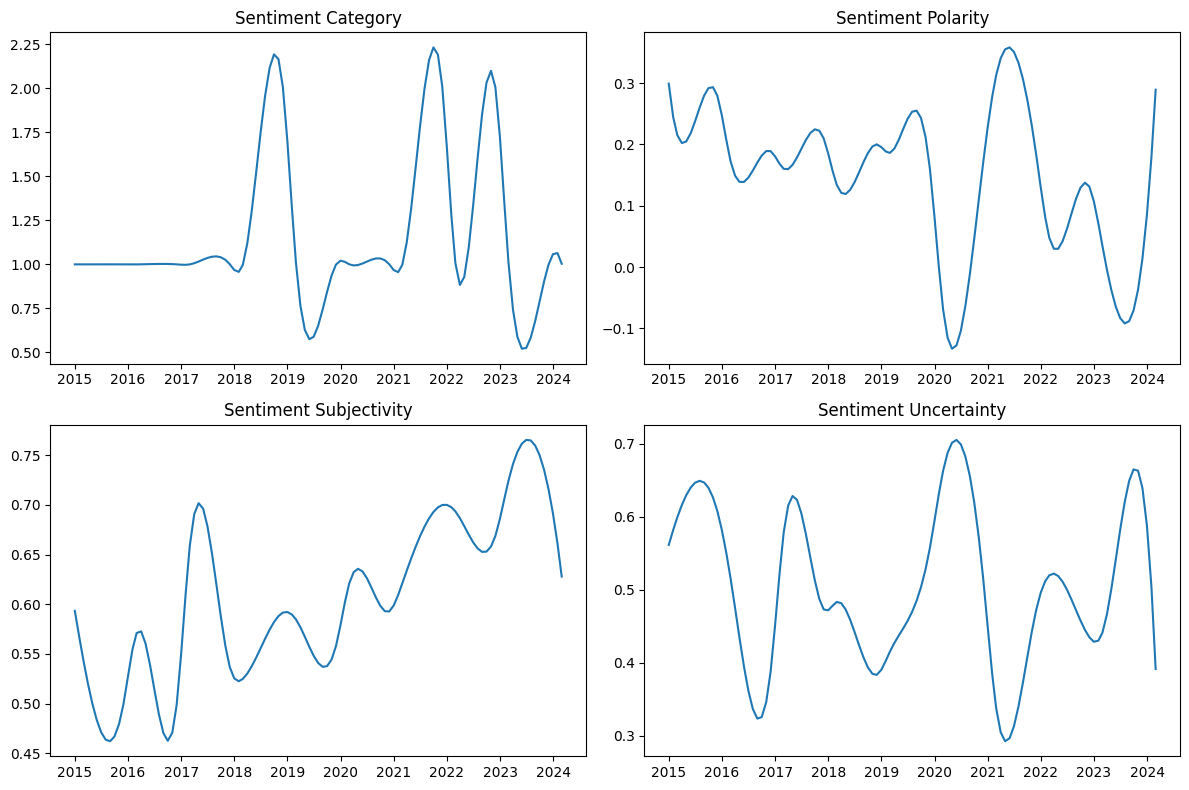

In [368]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].plot(monthly_df['Date'], monthly_df['Sentiment_Cat'])
axes[0, 0].set_title('Sentiment Category')

axes[0, 1].plot(monthly_df['Date'], monthly_df['Sentiment_Polarity'])
axes[0, 1].set_title('Sentiment Polarity')

axes[1, 0].plot(monthly_df['Date'], monthly_df['Sentiment_Subjectivity'])
axes[1, 0].set_title('Sentiment Subjectivity')

axes[1, 1].plot(monthly_df['Date'], monthly_df['Sentiment_Uncertainity'])
axes[1, 1].set_title('Sentiment Uncertainty')

fig.tight_layout()
plt.show()


In [369]:
def filter_data_by_date(df, start_date, end_date):
  # Convert 'Date' to datetime if needed
  if df['Date'].dtype != 'datetime64[ns]':
      df['Date'] = pd.to_datetime(df['Date'])

  # Convert start and end dates to datetime
  start_date = pd.to_datetime(start_date)
  end_date = pd.to_datetime(end_date)

  filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
  return filtered_df

filtered_M_dfr = filter_data_by_date(merged_df.copy(), '2014-12', '2024-02') # Create a copy to avoid modifying the original DataFrame

In [370]:
monthly_df['Date'].iloc[0]

Timestamp('2014-12-31 00:00:00')

In [371]:
monthly_df['Date'] = monthly_df['Date'].dt.strftime('%Y-%m')

In [372]:
filtered_M_dfr['Date'] = filtered_M_dfr['Date'].dt.to_period('M')

In [373]:
monthly_df['Date'] = pd.to_datetime(monthly_df['Date']).dt.to_period('M')

In [374]:
filtered_M_dfr['Date'].iloc[0] == monthly_df['Date'].iloc[0]

True

In [375]:
merged_df_final = pd.merge(filtered_M_dfr, monthly_df, on='Date', how='inner')

In [376]:
merged_df_final['UI']

,UI
0,115.654569
1,120.238846
2,98.449143
3,53.430374
4,52.308058
...,...
106,122.114043
107,104.736271
108,128.537213
109,129.908850


In [377]:
merged_df_final.rename(columns={'Sentiment_Cat': 'SC', 'Sentiment_Polarity': 'SP', 'Sentiment_Subjectivity': 'SS', 'Sentiment_Uncertainity': 'SU', }, inplace=True)

In [378]:
for column in merged_df_final.columns:
  if column != 'Date':
    merged_df_final[column] = merged_df_final[column].astype(float)

In [379]:
y = merged_df_final['INXRUSD.']
X = merged_df_final[['SS', 'SP', 'SU']]
X = sm.add_constant(X)  # Add a constant for the intercept
# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()
# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               INXRUSD.   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     68.71
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           7.60e-25
Time:                        10:42:55   Log-Likelihood:                -301.69
No. Observations:                 111   AIC:                             611.4
Df Residuals:                     107   BIC:                             622.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.4738      4.444     12.258      0.0

We can still see the high autocorrelation for these variables.

In [380]:
correlations = {}
for col in merged_df_final.columns:
  if col not in ['SS', 'SU', 'SP', 'Date']:
    correlations[col] = {
        'SS': merged_df_final['SS'].corr(merged_df_final[col]),
        'SU': merged_df_final['SU'].corr(merged_df_final[col]),
        'SP': merged_df_final['SP'].corr(merged_df_final[col])
    }

print(correlations)

{'INCONPRCF': {'SS': 0.7959824202271427, 'SU': -0.05169990343544891, 'SP': -0.45636004100823296}, 'INPRATE.': {'SS': -0.34641990517295645, 'SU': 0.14197506463824336, 'SP': 0.12272199572460941}, 'INGBOND.': {'SS': -0.3481323355762898, 'SU': -0.0052077720401313725, 'SP': 0.10905917415632639}, 'INM2....A': {'SS': 0.785194791592854, 'SU': -0.0838695234200137, 'SP': -0.43027682887676305}, 'INIPTOT.H': {'SS': 0.4999220476462162, 'SU': -0.2727560777220764, 'SP': -0.10215310413925767}, 'INXTW..RF': {'SS': 0.28251377402051947, 'SU': 0.05251145549198467, 'SP': -0.03218500848376965}, 'INXRUSD.': {'SS': 0.7531752620097081, 'SU': -0.029047677895401743, 'SP': -0.5175207651330853}, 'INM1....A': {'SS': 0.783826345799689, 'SU': -0.08276976698380992, 'SP': -0.42877851274523776}, 'INM4....A': {'SS': 0.8017828730137647, 'SU': -0.053936368303524405, 'SP': -0.4520375030888961}, 'INRESCURA': {'SS': 0.7379756034691833, 'SU': -0.13074073707476572, 'SP': -0.2849554346987229}, 'INXTW..NF': {'SS': -0.667822865901

In [381]:
filtered_correlations = {}
for col, corr_dict in correlations.items():
  filtered_correlations[col] = {k: v for k, v in corr_dict.items() if v > 0.4 or v < -0.4}

print(filtered_correlations)

{'INCONPRCF': {'SS': 0.7959824202271427, 'SP': -0.45636004100823296}, 'INPRATE.': {}, 'INGBOND.': {}, 'INM2....A': {'SS': 0.785194791592854, 'SP': -0.43027682887676305}, 'INIPTOT.H': {'SS': 0.4999220476462162}, 'INXTW..RF': {}, 'INXRUSD.': {'SS': 0.7531752620097081, 'SP': -0.5175207651330853}, 'INM1....A': {'SS': 0.783826345799689, 'SP': -0.42877851274523776}, 'INM4....A': {'SS': 0.8017828730137647, 'SP': -0.4520375030888961}, 'INRESCURA': {'SS': 0.7379756034691833}, 'INXTW..NF': {'SS': -0.6678228659011987, 'SP': 0.42880880696638496}, 'INVISGDSA': {'SS': -0.5839364040293025}, 'INBANKR.': {}, 'INBANKLPA': {'SS': 0.7925692277926358, 'SP': -0.4424115770183188}, 'INRESERVA': {'SS': 0.7798042209987831}, 'INM3....A': {'SS': 0.8025572141639405, 'SP': -0.4458945074312001}, 'INIPMAN.H': {'SS': 0.4089262140956088}, 'INPROPRCF': {'SS': 0.7827422482024402}, 'INGOVBALA': {}, nan: {}, 'INEXPGDSA': {'SS': 0.7381113943956901}, 'INIMPGDSA': {'SS': 0.7086197728326795}, 'INCCIPSOR': {}, 'INSHRPRCF': {'SS

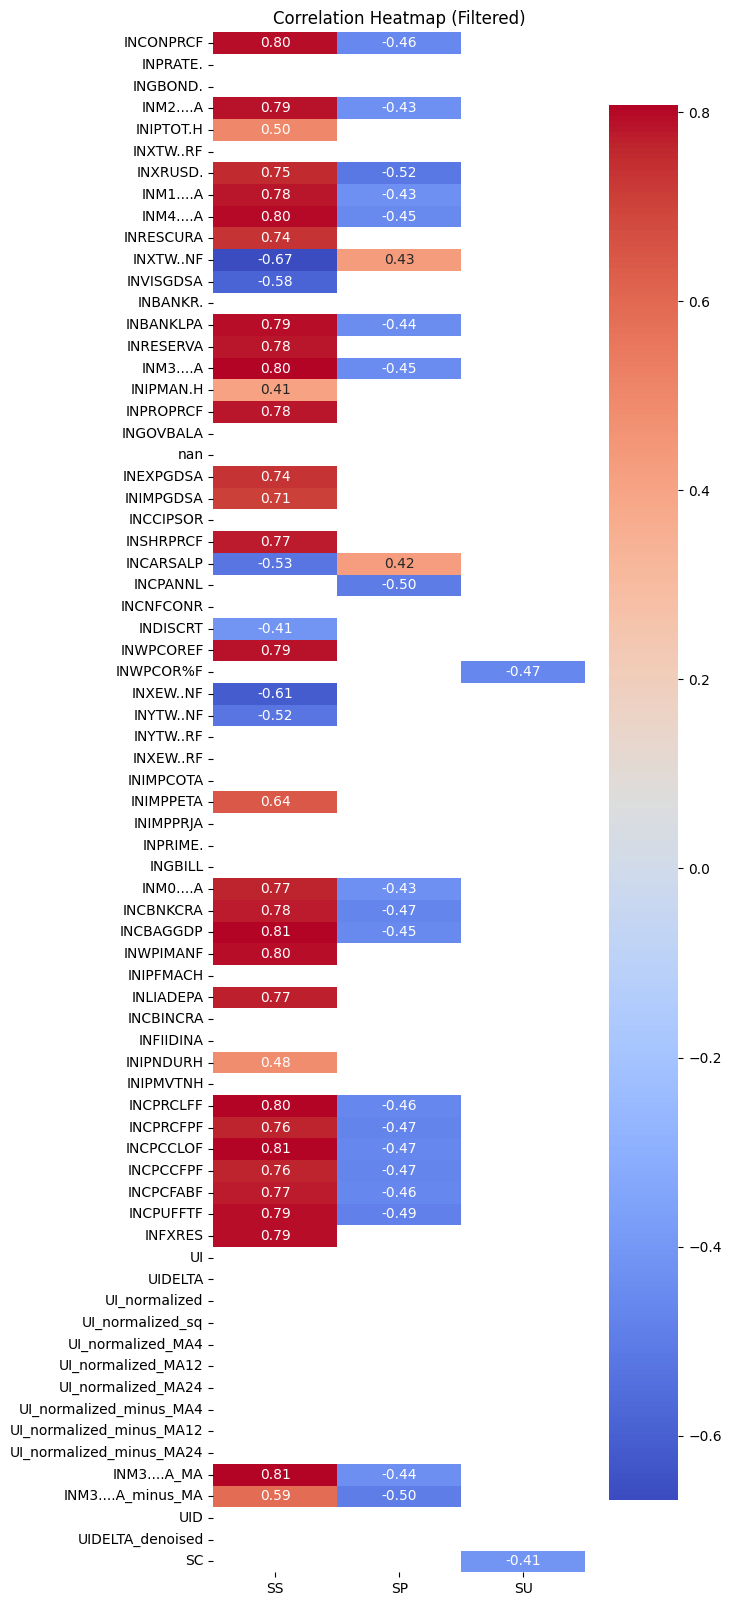

In [382]:
# prompt: Plot correlation heat map with the filtered values

import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant data for the heatmap
heatmap_data = pd.DataFrame(filtered_correlations).transpose()

# Create the heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Filtered)')
plt.show()


Now we change our approach from taking the direct value of the dependent and intependent features to taking their difference/change. This might address the issue of autocorelation.

In [383]:
merged_df_final['SSD'] = merged_df_final['SS'].diff()
merged_df_final['XRD'] = merged_df_final['INXRUSD.'].diff()
# Fill any NaN values that might result from the differencing (usually the first value)
merged_df_final['SSD'].fillna(0, inplace=True)
merged_df_final['XRD'].fillna(0, inplace=True)

In [384]:
merged_df_final['UID'] = merged_df_final['UI'].diff()

In [385]:
merged_df_final['UID'].fillna(0, inplace=True)

In [386]:
merged_df_final['SPD'] = merged_df_final['SP'].diff()
merged_df_final['SPD'].fillna(0, inplace=True)

In [387]:
scaler = MinMaxScaler(feature_range=(-1, 1))
merged_df_final['SSDN'] = scaler.fit_transform(merged_df_final['SSD'].values.reshape(-1, 1))
merged_df_final['SSN'] = scaler.fit_transform(merged_df_final['SS'].values.reshape(-1, 1))
merged_df_final['XRDN'] = scaler.fit_transform(merged_df_final['XRD'].values.reshape(-1, 1))
merged_df_final['PIN'] = scaler.fit_transform(merged_df_final['INCPANNL'].values.reshape(-1, 1))
merged_df_final['UIN'] = scaler.fit_transform(merged_df_final['UI'].values.reshape(-1, 1))
merged_df_final['UIDN'] = scaler.fit_transform(merged_df_final['UID'].values.reshape(-1, 1))
merged_df_final['SPDN'] = scaler.fit_transform(merged_df_final['SPD'].values.reshape(-1, 1))

In [388]:
y = merged_df_final['XRDN']
X = merged_df_final[['SSD', 'PIN','UIDN','SPD']]
X = sm.add_constant(X)

# Initial OLS regression
ols_model_robust = OLS(y, X).fit(cov_type='HC3')

# Use the correct variable name to access residuals
residuals = ols_model_robust.resid

# Fit ARIMA model to residuals
arima_model = ARIMA(residuals, order=(1, 0, 0))
arima_fit = arima_model.fit()

# Adjust y using ARIMA residuals
y_adj = y - arima_fit.resid

# Final OLS regression with adjusted y
final_model = OLS(y_adj, X).fit()
print(final_model.summary())

# Calculate VIF
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif_data)

# Ridge Regression as an alternative
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
print(ridge_model.coef_)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.306e+04
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          9.43e-142
Time:                        10:42:56   Log-Likelihood:                 419.48
No. Observations:                 111   AIC:                            -829.0
Df Residuals:                     106   BIC:                            -815.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1710      0.001   -312.005      0.0

We can clearly see we have somewhat solved our problem of autocorellation but have introduced a new problem of overfitting.

**To tackle this, we now remove all the outliers from dependent and independent variables.**

In [389]:
Q1 = merged_df_final['UIDN'].quantile(0.25)
Q3 = merged_df_final['UIDN'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median = merged_df_final['UIDN'].median()
merged_df_final['UIDN'] = np.where(
    (merged_df_final['UIDN'] < lower_bound) | (merged_df_final['UIDN'] > upper_bound),
    median,
    merged_df_final['UIDN']
)

In [390]:
Q1 = merged_df_final['PIN'].quantile(0.25)
Q3 = merged_df_final['PIN'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median = merged_df_final['PIN'].median()
merged_df_final['PIN'] = np.where(
    (merged_df_final['PIN'] < lower_bound) | (merged_df_final['PIN'] > upper_bound),
    median,
    merged_df_final['PIN']
)

In [391]:
Q1 = merged_df_final['XRDN'].quantile(0.25)
Q3 = merged_df_final['XRDN'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median = merged_df_final['XRDN'].median()
merged_df_final['XRDN'] = np.where(
    (merged_df_final['XRDN'] < lower_bound) | (merged_df_final['XRDN'] > upper_bound),
    median,
    merged_df_final['XRDN']
)

In [392]:
Q1 = merged_df_final['SSDN'].quantile(0.25)
Q3 = merged_df_final['SSDN'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median = merged_df_final['SSDN'].median()
merged_df_final['SSDN'] = np.where(
    (merged_df_final['SSDN'] < lower_bound) | (merged_df_final['SSDN'] > upper_bound),
    median,
    merged_df_final['SSDN']
)

In [393]:
Q1 = merged_df_final['SPDN'].quantile(0.25)
Q3 = merged_df_final['SPDN'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median = merged_df_final['SPDN'].median()
merged_df_final['SPDN'] = np.where(
    (merged_df_final['SPDN'] < lower_bound) | (merged_df_final['SPDN'] > upper_bound),
    median,
    merged_df_final['SPDN']
)

In [397]:
y = merged_df_final['XRDN']
X = merged_df_final[['SSDN', 'PIN','UIDN','SPDN']]
X = sm.add_constant(X)

# Initial OLS regression
ols_model_robust = OLS(y, X).fit(cov_type='HC3')

# Use the correct variable name to access residuals
residuals = ols_model_robust.resid

# Fit ARIMA model to residuals
arima_model = ARIMA(residuals, order=(3, 0, 0))
arima_fit = arima_model.fit()

# Adjust y using ARIMA residuals
y_adj = y - arima_fit.resid

# Final OLS regression with adjusted y
final_model = OLS(y_adj, X).fit()
print(final_model.summary())

# Calculate VIF
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif_data)

# Ridge Regression as an alternative
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
print(ridge_model.coef_)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     540.5
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.61e-69
Time:                        10:43:33   Log-Likelihood:                 246.45
No. Observations:                 111   AIC:                            -482.9
Df Residuals:                     106   BIC:                            -469.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1940      0.004    -44.679      0.0

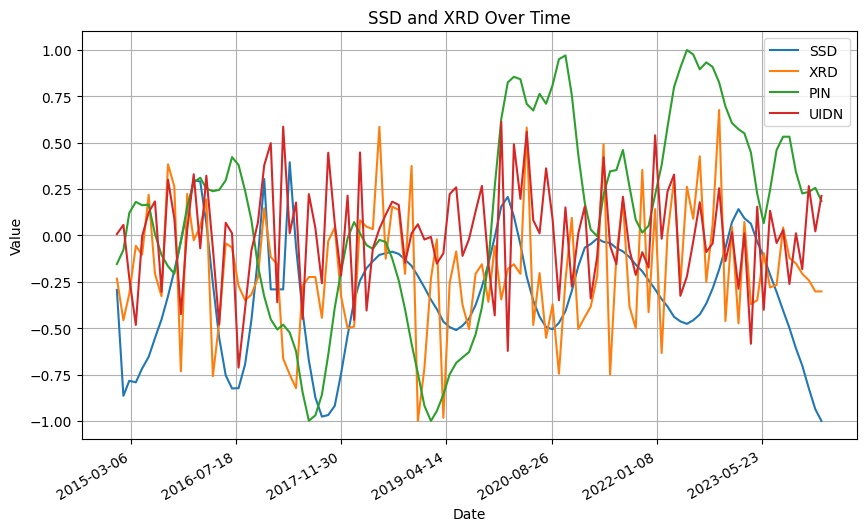

In [398]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
if merged_df_final['Date'].dtype == 'period[D]':  # Check if 'Date' is Period type
    merged_df_final['Date'] = merged_df_final['Date'].dt.to_timestamp()

# Plot SSD and XRD together
plt.figure(figsize=(10, 6))
# Convert dates to numbers for plotting
plt.plot(mdates.date2num(merged_df_final['Date']), merged_df_final['SSDN'], label='SSD')
plt.plot(mdates.date2num(merged_df_final['Date']), merged_df_final['XRDN'], label='XRD')
plt.plot(mdates.date2num(merged_df_final['Date']), merged_df_final['PIN'], label='PIN')
plt.plot(mdates.date2num(merged_df_final['Date']), merged_df_final['UIDN'], label='UIDN')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SSD and XRD Over Time')
plt.legend()
plt.grid(True)

# Format x-axis for dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Customize date format as needed
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

plt.show()

In [ ]:
merged_df_final = merged_df_final.drop('column_to_drop', axis=1)

After testing for different lag values, we ended up choosing the following lags for prediciting exchange rate :
4th and 8th lag of Sentiment Subjectivity of MP Report
2nd and no lag of Uncertainity index
2nd lag of Sentiment polarity of Monetary policy report.

Reason for choosing the lags which we did was a bit intuitive and a bit of testing.
Intiution : Sentiments from Monetary Policy report will show their effects a bit later in time whereas the uncertainity of media transmission will show an immediate effect.

In [412]:

y = merged_df_final['XRDN']
X = merged_df_final[['SSDN', 'PIN','UIDN','SPDN']]

# Introduce lags
for lag in [4,8]:  # Adjust the number of lags as needed
    X = pd.concat([X, merged_df_final[['SSDN']].shift(lag).rename(columns=lambda x: x + f'_lag{lag}')], axis=1)
for lag in [2]:  # Adjust the number of lags as needed
    X = pd.concat([X, merged_df_final[['UIDN']].shift(lag).rename(columns=lambda x: x + f'_lag{lag}')], axis=1)
for lag in [2]:  # Adjust the number of lags as needed
    X = pd.concat([X, merged_df_final[['SPDN']].shift(lag).rename(columns=lambda x: x + f'_lag{lag}')], axis=1)

X.drop('SSDN', axis = 1, inplace = True)
X.drop('SPDN', axis = 1, inplace = True)

X = sm.add_constant(X)  # Add a constant for the intercept
X.fillna(method='bfill', inplace=True)  # Handle NaN values introduced by lags

# Initial OLS regression
ols_model_robust = OLS(y, X).fit(cov_type='HC3')

# Fit ARIMA model to residuals
residuals = ols_model_robust.resid
arima_model = ARIMA(residuals, order=(1, 0, 0))  # Adjust ARIMA order if needed
arima_fit = arima_model.fit()

# Adjust y using ARIMA residuals
y_adj = y - arima_fit.resid

# Final OLS regression with adjusted y
final_model = OLS(y_adj, X).fit()
print(final_model.summary())

# Calculate VIF
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif_data)

<ipython-input-412-5b481128bcbd>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='bfill', inplace=True)  # Handle NaN values introduced by lags


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     140.4
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.53e-47
Time:                        10:55:37   Log-Likelihood:                 174.31
No. Observations:                 111   AIC:                            -334.6
Df Residuals:                     104   BIC:                            -315.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3240      0.010    -33.896      0.0

Following is a model, where it chooses the order of ARIMA on its own and finds the best combination of p,q,r iteratively.

In [415]:
y = merged_df_final['XRDN']
X = merged_df_final[['SSDN', 'PIN', 'UIDN', 'SPDN']]

# Introduce lags for 'SSDN', 'UIDN', and 'SPDN'
lags = {
    'SSDN': [4, 8],  # Adjust the number of lags as needed
    'UIDN': [2],     # Adjust the number of lags as needed
    'SPDN': [2]      # Adjust the number of lags as needed
}

for col, lag_list in lags.items():
    for lag in lag_list:
        lagged_col = merged_df_final[[col]].shift(lag).rename(columns=lambda x: f'{x}_lag{lag}')
        X = pd.concat([X, lagged_col], axis=1)

# Drop original 'SSDN' and 'SPDN' to avoid multicollinearity with their lags
X.drop(columns=['SSDN', 'SPDN'], inplace=True)

# Add a constant for the intercept and handle missing values
X = sm.add_constant(X)
X.fillna(method='bfill', inplace=True)  # Backward fill to handle NaN values introduced by lags

# Initial OLS regression with robust standard errors
ols_model_robust = OLS(y, X).fit(cov_type='HC3')

# Fit ARIMA model to residuals to adjust for autocorrelation
residuals = ols_model_robust.resid
# Use a loop or a function to find the optimal ARIMA order if necessary
best_aic = float("inf")
best_order = None
for p in range(1, 4):
    for q in range(0, 3):
        try:
            arima_model = ARIMA(residuals, order=(p, 0, q))
            arima_fit = arima_model.fit()
            if arima_fit.aic < best_aic:
                best_aic = arima_fit.aic
                best_order = (p, 0, q)
        except:
            continue

# Use the best ARIMA order found
arima_model = ARIMA(residuals, order=best_order)
arima_fit = arima_model.fit()

# Adjust y using ARIMA residuals
y_adj = y - arima_fit.resid

# Final OLS regression with adjusted y
final_model = OLS(y_adj, X).fit()
print(final_model.summary())

# Calculate Variance Inflation Factor (VIF) to check for multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


<ipython-input-415-d1b667330910>:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='bfill', inplace=True)  # Backward fill to handle NaN values introduced by lags
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     402.8
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           1.34e-69
Time:                        10:59:22   Log-Likelihood:                 232.92
No. Observations:                 111   AIC:                            -451.8
Df Residuals:                     104   BIC:                            -432.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3262      0.006    -57.860      0.0

We have addressed almost all the problems we have been facing. Now let's see how did the prediction go.

In [423]:
# Get the original exogenous variables used to train the model
X_train = final_gls_model.model.exog
# Make predictions using the original exogenous variables structure
predictions = final_gls_model.predict(X_train)

In [424]:
predictions

array([-0.22419596, -0.19668664, -0.26043333, -0.25131644, -0.1020629 ,
        0.0549086 , -0.05409651, -0.26398109, -0.10728324, -0.03577292,
       -0.28861937, -0.08940865,  0.0796924 , -0.11947548, -0.0589019 ,
       -0.16622551, -0.41477712, -0.21422422, -0.16467258, -0.46429269,
       -0.35925386, -0.15029284, -0.13243564, -0.04287519, -0.01146624,
       -0.33977934, -0.07992271, -0.23021998, -0.23792262, -0.44898189,
       -0.34312626, -0.51949581, -0.51123434, -0.16025826, -0.15266931,
       -0.37914252, -0.05246869, -0.14570125,  0.13475566, -0.05244554,
       -0.10182636,  0.00561438, -0.06390285, -0.12392772, -0.2079191 ,
       -0.38575353, -0.38048175, -0.35479993, -0.42682913, -0.42947922,
       -0.43948484, -0.39718644, -0.25145698, -0.23584084, -0.39212547,
       -0.34735401, -0.21629454, -0.14048989, -0.24216971, -0.26357814,
        0.20999643, -0.10694594,  0.00429625,  0.042027  ,  0.05914449,
       -0.12351773, -0.22994506, -0.09181377, -0.18238947, -0.36

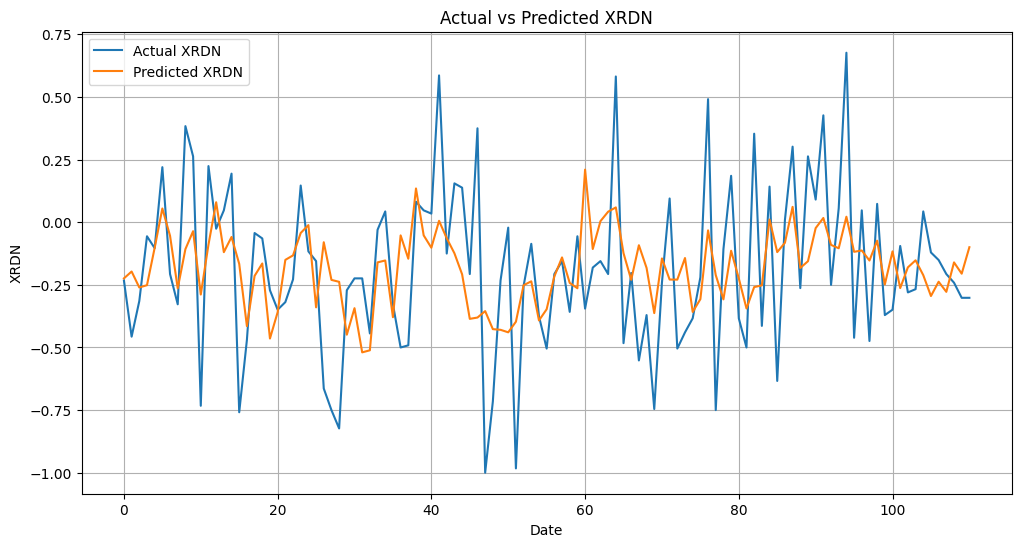

In [425]:
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Actual XRDN')
plt.plot(y.index, predictions, label='Predicted XRDN')
plt.xlabel('Date')
plt.ylabel('XRDN')
plt.title('Actual vs Predicted XRDN')
plt.legend()
plt.grid(True)
plt.show()
